# PROJECT AKHIR KECERDASAN BUATAN B1 2020 

### Kelompok 2:

2009106067 Mar'atus Sholeha

2009106064 Krisdayanti

2009106058 Rista Safitri

### Import Library yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
#Import library untuk visualisasi
import matplotlib.pyplot as plt
from wordcloud import WordCloud

C:\Users\ASUS\OneDrive\Dokumen\Praktikum KB\venv_B1-20\Krisdt_064\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\OneDrive\Dokumen\Praktikum KB\venv_B1-20\Krisdt_064\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ASUS\OneDrive\Dokumen\Praktikum KB\venv_B1-20\Krisdt_064\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data Collecting

### Import Dataset

In [2]:
dataset = pd.read_csv("dataset_youtube.csv")
dataset

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,Category Comment
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,neutral
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,neutral
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzryH8U6Dz_yBmIgEZ4AaABAg,LR ICED WOLF,3.2 Million comments if you find mine your a l...,2020-03-15T21:11:08Z,370547,positive
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugw61yKNdyVJ5T4R_sN4AaABAg,MemeDille,The ones who are NOT from Tik-Tok can like thi...,2020-09-08T08:44:47Z,94,negative
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxcqxyEw2jU7KvhofV4AaABAg,cruisendude,The first viewer must feel like the king of th...,2020-08-21T23:15:01Z,36446,positive
...,...,...,...,...,...,...,...,...
1494,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,Ugx0v_kwt_OjHumTf314AaABAg,TheNastyMan 420,Good job chris on the 1 bil. I knew this song ...,2020-09-06T02:21:45Z,7,positive
1495,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgzmGOdpkEGRQmGDoyd4AaABAg,Yuvraj Sahota,Lets see whos here from september to december ...,2020-09-03T22:12:07Z,2,positive
1496,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgyZwUKM_fkKAA2S9IZ4AaABAg,Rod Reactz,1 billion views this song is so underrated,2020-09-08T15:14:08Z,1,neutral
1497,Chris Brown - Loyal (Official Video) ft. Lil W...,ChrisBrownVEVO,UgyOHVIZqvR3WfqErRJ4AaABAg,Zawad Hossain,"As soon as this hits 1 Billi, everyone go to C...",2020-08-25T17:31:20Z,208,positive


# PREPROCCESING

### Menampilkan dataset berdasarkan kolom comment & category comment

In [3]:
dataset = pd.DataFrame(dataset[['Comment','Category Comment']])
dataset

,Comment,Category Comment
0,The people who liked this comment is officiall...,neutral
1,Let's be honest this wasn't your recommendatio...,neutral
2,3.2 Million comments if you find mine your a l...,positive
3,The ones who are NOT from Tik-Tok can like thi...,negative
4,The first viewer must feel like the king of th...,positive
...,...,...
1494,Good job chris on the 1 bil. I knew this song ...,positive
1495,Lets see whos here from september to december ...,positive
1496,1 billion views this song is so underrated,neutral
1497,"As soon as this hits 1 Billi, everyone go to C...",positive


### Menghapus beberapa karakter yang ada di dalam comment

In [4]:
dataset['Comment'] = dataset['Comment'].str.replace('(@\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('(#\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('(&\w+.*?)',"")
dataset['Comment'] = dataset['Comment'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
dataset['Comment'] = dataset['Comment'].str.replace(r"[0-9]", '')
dataset['Comment'] = dataset['Comment'].str.replace(r'  ', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r'   ', ' ')
dataset['Comment'] = dataset['Comment'].str.replace(r"[\,\+\_\-\:\!\%\;\/\\]", ' ')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14308\1461539364.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Comment'] = dataset['Comment'].str.replace('(@\w+.*?)',"")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14308\1461539364.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Comment'] = dataset['Comment'].str.replace('(#\w+.*?)',"")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14308\1461539364.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Comment'] = dataset['Comment'].str.replace('(&\w+.*?)',"")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14308\1461539364.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Comment'] = dataset['Comment'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
C:\Users\

### Menghapus single character

In [5]:
def remove_singl_char(teks):
    return re.sub(r"\b[a-zA-Z]\b", "", teks)

dataset['Comment'] = dataset['Comment'].apply(remove_singl_char)

### Menghapus indentasi (:) pada kolom Comment di dataset

In [6]:
def remove_whitespace_LT(teks):
    return teks.strip()

dataset['Comment'] = dataset['Comment'].apply(remove_whitespace_LT)

### Menghapus spasi double

In [7]:
def remove_whitespace_multiple(teks):
    return re.sub('\s+',' ',teks)

dataset['Comment'] = dataset['Comment'].apply(remove_whitespace_multiple)

### Menghapus tanda baca pada kolom Comment dataset

In [8]:
def remove_punctuation(teks):
    return teks.translate(str.maketrans("","",string.punctuation))

dataset['Comment'] = dataset['Comment'].apply(remove_punctuation)

### Mengubah semua guruf menjadi huruf kecil

In [9]:
dataset['Comment'] = dataset['Comment'].str.lower()
dataset

,Comment,Category Comment
0,the people who liked this comment is officiall...,neutral
1,lets be honest this wasnt your recommendation ...,neutral
2,million comments if you find mine your legend,positive
3,the ones who are not from tik tok can like thi...,negative
4,the first viewer must feel like the king of th...,positive
...,...,...
1494,good job chris on the bil knew this song would...,positive
1495,lets see whos here from september to december,positive
1496,billion views this song is so underrated,neutral
1497,as soon as this hits billi everyone go to chri...,positive


### Menghapus Comment yang mengandung akhiran titik 3 (contoh: lol...)

In [10]:
dataset_titik_ilang=[]
for i in dataset.index:

  dataset_titik_ilang.append(re.sub("[A-Za-z0-9]+\*", "", dataset['Comment'][i]))

dataset['Comment'] = pd.DataFrame(dataset_titik_ilang)

### Melihat dataset seletah proses menghapus @.. dan hashtag, menghapus url, link, dan karakter spesial

In [11]:
dataset

,Comment,Category Comment
0,the people who liked this comment is officiall...,neutral
1,lets be honest this wasnt your recommendation ...,neutral
2,million comments if you find mine your legend,positive
3,the ones who are not from tik tok can like thi...,negative
4,the first viewer must feel like the king of th...,positive
...,...,...
1494,good job chris on the bil knew this song would...,positive
1495,lets see whos here from september to december,positive
1496,billion views this song is so underrated,neutral
1497,as soon as this hits billi everyone go to chri...,positive


### Mengecek apakah di dalam dataset terdapat kolom yang bernilai null

In [12]:
dataset.isna().sum()

Comment             0
Category Comment    0
dtype: int64

### Mengecek apakah di dalam dataset terdapat data duplikat (terdapat 2 data yang sama)

In [13]:
dataset.Comment.duplicated().sum()

216

### Menampilkan  data dari dataset yang nilainya sama (merupakan duplikasi)

In [14]:
dataset.loc[dataset.Comment.duplicated(), :]

,Comment,Category Comment
10,the people who liked this comment is officiall...,neutral
13,the people who liked this comment is officiall...,neutral
14,the people who liked this comment is officiall...,neutral
15,the people who liked this comment is officiall...,neutral
27,the people who liked this comment is officiall...,neutral
...,...,...
1451,im surprised nintendo hasnt striked drake for ...,neutral
1452,listening to this to remember the old days whe...,positive
1453,drake is the type of person to install air con...,neutral
1477,its crazy how we are listening to these songs ...,positive


### Menghapus data duplikat di didalam dataset

In [15]:
dataset_bersih = dataset.drop_duplicates(subset=["Comment"])
dataset_bersih.reset_index(drop=True, inplace = True)

### Mengecek kembali ke dalam dataset apakah dataset yang digunakan masih memiliki data duplikat

In [16]:
dataset_bersih.Comment.duplicated().sum()

0

### Mengecek jumlah kolom dan baris dataset

In [17]:
dataset_bersih.shape

(1283, 2)

### Menyimpan dataset bersih

In [18]:
dataset_bersih.to_csv('dataset_youtube_bersih.csv')

### Import dataset baru

In [19]:
df_bersih = pd.read_csv('dataset_youtube_bersih.csv')
df_bersih

,Unnamed: 0,Comment,Category Comment
0,0,the people who liked this comment is officiall...,neutral
1,1,lets be honest this wasnt your recommendation ...,neutral
2,2,million comments if you find mine your legend,positive
3,3,the ones who are not from tik tok can like thi...,negative
4,4,the first viewer must feel like the king of th...,positive
...,...,...,...
1278,1278,good job chris on the bil knew this song would...,positive
1279,1279,lets see whos here from september to december,positive
1280,1280,billion views this song is so underrated,neutral
1281,1281,as soon as this hits billi everyone go to chri...,positive


### Menghapus kolom "Unnamed: 0" yg terdapat dalam dataset

In [20]:
del df_bersih['Unnamed: 0']

### Melihat data target, label encoding, dan menjadikan nilai neutral = 0, positive = 1, & negative = 2

In [21]:
df_bersih['Target_type'] = df_bersih['Category Comment'].map({'neutral': 0, 'positive':1, 'negative': 2})
df_bersih

,Comment,Category Comment,Target_type
0,the people who liked this comment is officiall...,neutral,0
1,lets be honest this wasnt your recommendation ...,neutral,0
2,million comments if you find mine your legend,positive,1
3,the ones who are not from tik tok can like thi...,negative,2
4,the first viewer must feel like the king of th...,positive,1
...,...,...,...
1278,good job chris on the bil knew this song would...,positive,1
1279,lets see whos here from september to december,positive,1
1280,billion views this song is so underrated,neutral,0
1281,as soon as this hits billi everyone go to chri...,positive,1


### Melihat jumlah record dari setiap label dalam kolom Category Comment

In [22]:
df_bersih['Category Comment'].value_counts()

positive    813
neutral     360
negative    110
Name: Category Comment, dtype: int64

### Melakukan Oversampling

In [23]:
df_negatif = df_bersih.loc[df_bersih['Category Comment'] == 'negative']
df_negatif_gabungan = pd.concat([df_negatif,df_negatif,df_negatif,df_negatif])
df_negatif_gabungan.reset_index(drop = True, inplace = True)
df_negatif_gabungan

,Comment,Category Comment,Target_type
0,the ones who are not from tik tok can like thi...,negative,2
1,these dislikes were people from who didnt sing...,negative,2
2,can you stop liking now the notifications gett...,negative,2
3,only people who didnt came from tik tok are wo...,negative,2
4,it has mor dislikes than de average likes of b...,negative,2
...,...,...,...
435,never really liked this song but the meme like...,negative,2
436,no nudes no drugs no alcohol just some meme ma...,negative,2
437,this sounds so weird without the wii shop musi...,negative,2
438,if you mess with me like rohan once did youre ...,negative,2


### Menggabungkan data minor oversampling ke dalam dataset

In [24]:
data_final = pd.concat([df_bersih,df_negatif_gabungan])
data_final.reset_index(drop=True, inplace = True)
data_final

,Comment,Category Comment,Target_type
0,the people who liked this comment is officiall...,neutral,0
1,lets be honest this wasnt your recommendation ...,neutral,0
2,million comments if you find mine your legend,positive,1
3,the ones who are not from tik tok can like thi...,negative,2
4,the first viewer must feel like the king of th...,positive,1
...,...,...,...
1718,never really liked this song but the meme like...,negative,2
1719,no nudes no drugs no alcohol just some meme ma...,negative,2
1720,this sounds so weird without the wii shop musi...,negative,2
1721,if you mess with me like rohan once did youre ...,negative,2


### Menyimpan dataset yang sudah dibersihkan ke dalam dataset baru

In [25]:
data_final.to_csv('dataset_bersih.csv')

## TOKENISASI

In [26]:
def token(teks):
  nstr = teks.split(" ")
  dt = []
  a = -1
  for i in nstr:
    a = a + 1
  if i == '':
    dt.append(a)
  p = 0
  b = 0
  for q in dt:
    b = q - p
    del nstr[b]
    p = p + 1
  return nstr

In [27]:
data_final['Comment'] = data_final['Comment'].apply(token)

In [28]:
data_final

,Comment,Category Comment,Target_type
0,"[the, people, who, liked, this, comment, is, o...",neutral,0
1,"[lets, be, honest, this, wasnt, your, recommen...",neutral,0
2,"[million, comments, if, you, find, mine, your,...",positive,1
3,"[the, ones, who, are, not, from, tik, tok, can...",negative,2
4,"[the, first, viewer, must, feel, like, the, ki...",positive,1
...,...,...,...
1718,"[never, really, liked, this, song, but, the, m...",negative,2
1719,"[no, nudes, no, drugs, no, alcohol, just, some...",negative,2
1720,"[this, sounds, so, weird, without, the, wii, s...",negative,2
1721,"[if, you, mess, with, me, like, rohan, once, d...",negative,2


## Hapus stopwords

### Import nltk, download & import stopword

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Menghapus stopwords

In [30]:
list_stopwords = stopwords.words('english')

#read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

#convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

#convert list ke dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_final['Comment'] = data_final['Comment'].apply(stopwords_removal) 

#menampilkan 10 record awal kolom comment
data_final['Comment'].head(10)

0          [people, liked, comment, officially, views]
1      [lets, honest, wasnt, recommendation, searched]
2              [million, comments, find, mine, legend]
3                      [ones, tik, tok, like, comment]
4       [first, viewer, must, feel, like, king, world]
5             [imagine, many, peoples, come, everyday]
6                       [comments, find, mine, legend]
7                                 [came, check, views]
8    [imagine, many, armys, coming, every, secondsm...
9                                         [hey, mikee]
Name: Comment, dtype: object

## STEMMING

### Install library untuk stemming word

In [31]:
!pip install english-dictionary
!pip install nltk
!pip install english-word
!pip install swifter


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement english-word (from versions: none)
ERROR: No matching distribution found for english-word

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import library swifter & nltk. Download model  punkt  dari nltk

In [32]:
import swifter
import nltk

nltk.download() #download model punkt

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Import package PorterStemmer dan word_tokenize dari library nltk

In [33]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [34]:
# Membuat variabel untuk class PorterStemmer
porter = PorterStemmer()

# Testing stemmer
print("Porter Stemmer Testing")
print("cats \t\t:", porter.stem("cats"))
print("troble \t\t:", porter.stem("trouble"))
print("troubling \t:", porter.stem("troubling"))
print("troubled \t:", porter.stem("troubled"))

Porter Stemmer Testing
cats 		: cat
troble 		: troubl
troubling 	: troubl
troubled 	: troubl


### Membuat model stemmer

In [35]:
# Stemmed
def stemmed_wrapper(term):
    return porter.stem(term)

term_dict = {}

for document in data_final['Comment']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

2074
------------------------
people : peopl
liked : like
comment : comment
officially : offici
views : view
lets : let
honest : honest
wasnt : wasnt
recommendation : recommend
searched : search
million : million
comments : comment
find : find
mine : mine
legend : legend
ones : one
tik : tik
tok : tok
like : like
first : first
viewer : viewer
must : must
feel : feel
king : king
world : world
imagine : imagin
many : mani
peoples : peopl
come : come
everyday : everyday
came : came
check : check
armys : armi
coming : come
every : everi
secondsminuteshours : secondsminuteshour
hey : hey
mikee : mike
dislikes : dislik
didnt : didnt
sing : sing
despacito : despacito
carefully : care
stop : stop
liking : like
notifications : notif
getting : get
annoying : annoy
population : popul
dont : dont
worry : worri
youre : your
one : one
whos : who
watching : watch
quarantine : quarantin
look : look
person : person
reading : read
new : new
song : song
reached : reach
worthy : worthi
billion : billion
h

activates : activ
harder : harder
drop : drop
dubstep : dubstep
evanescence : evanesc
remix : remix
epic : epic
coffin : coffin
dancers : dancer
free : free
wonderful : wonder
found : found
diabetic : diabet
theres : there
couple : coupl
bored : bore
scrolled : scroll
acting : act
true : true
holy : holi
remembered : rememb
car : car
reason : reason
tarzon : tarzon
jungle : jungl
looks : look
beautiful : beauti
blonde : blond
almost : almost
exactly : exactli
katy : kati
gorgeous : gorgeou
looking : look
long : long
blue : blue
gotten : gotten
thru : thru
gonna : gonna
baby : babi
willy : willi
wonka : wonka
met : met
oompa : oompa
loompas : loompa
hearing : hear
thinks : think
perry : perri
bruh : bruh
teachers : teacher
school : school
scared : scare
defeat : defeat
lion : lion
sep : sep
rich : rich
kindergarten : kindergarten
teacher : teacher
let : let
uploaded : upload
cave : cave
animation : anim
tiger : tiger
humans : human
inspired : inspir
ice : ice
age : age
swear : swear
poi

city : citi
art : art
mulan : mulan
thruuuuu : thruuuuu
audio : audio
pretending : pretend
stripper : stripper
dosent : dosent
rong : rong
transformers : transform
series : seri
nintendo : nintendo
striked : strike
mii : mii
shop : shop
install : instal
conditioning : condit
sauna : sauna
memes : meme
meme : meme
nature : natur
gained : gain
experience : experi
cleansing : cleans
older : older
virgin : virgin
licks : lick
finger : finger
page : page
drugs : drug
alcohol : alcohol
material : materi
wii : wii
background : background
dies : die
pillowfight : pillowfight
dessert : dessert
meal : meal
ruler : ruler
pillow : pillow
measure : measur
slept : slept
trap : trap
beginning : begin
dared : dare
guarantee : guarante
acted : act
goofy : goofi
vines : vine
marketing : market
genius : geniu
unable : unabl
enjoyed : enjoy
strongest : strongest
behind : behind
closed : close
doorslove : doorslov
faults : fault
fight : fight
battles : battl
mess : mess
rohan : rohan
tickets : ticket
pillo

### Mengaplikasikan model stemmer yang sudah dibuat ke dataframe colom "Comment"

In [36]:
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_final['Comment'] = data_final['Comment'].swifter.apply(get_stemmed_term)

Pandas Apply:   0%|          | 0/1723 [00:00<?, ?it/s]

### Menampilkan kata yang sudah di-stemmer

In [37]:
stemmed_words = pd.DataFrame(data_final[['Comment']])
stemmed_words

,Comment
0,"[peopl, like, comment, offici, view]"
1,"[let, honest, wasnt, recommend, search]"
2,"[million, comment, find, mine, legend]"
3,"[one, tik, tok, like, comment]"
4,"[first, viewer, must, feel, like, king, world]"
...,...
1718,"[never, realli, like, song, meme, like, natur,..."
1719,"[nude, drug, alcohol, meme, materi]"
1720,"[sound, weird, without, wii, shop, music, back..."
1721,"[mess, like, rohan, your, dead]"


## Visualisasi

### Pie Chart

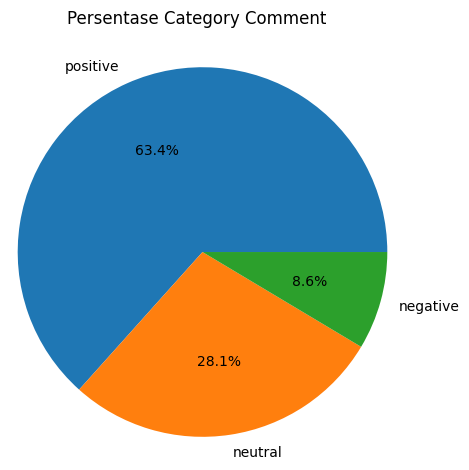

In [38]:
label = df_bersih['Category Comment'].value_counts().index
label_count = df_bersih['Category Comment'].value_counts().values

plt.figure(figsize=(5,5))
plt.pie(x=label_count, labels=label, autopct='%1.1f%%', radius=1.2)
plt.suptitle('Persentase Category Comment')
plt.show()

### Word Cloud

#### Label Positive

(-0.5, 399.5, 199.5, -0.5)

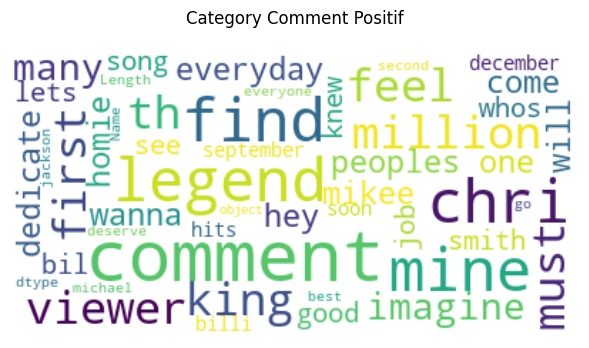

In [39]:
%matplotlib inline
plt.figure(figsize=(25, 15))
positive_tweets = df_bersih['Comment'][df_bersih["Category Comment"] == 'positive']
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(positive_tweets))
plt.subplot(1, 3, 1)
plt.title("Category Comment Positif\n")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")

#### Label Negative

(-0.5, 399.5, 199.5, -0.5)

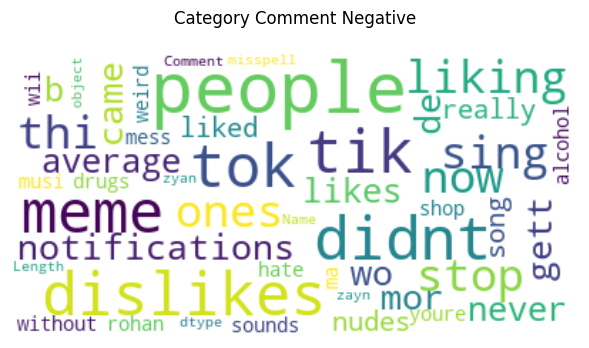

In [40]:
%matplotlib inline
plt.figure(figsize=(25, 15))
negative_tweets = df_bersih['Comment'][df_bersih["Category Comment"] == 'negative']
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(negative_tweets))
plt.subplot(1, 3, 1)
plt.title("Category Comment Negative\n")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")

#### Label Neutral

(-0.5, 399.5, 199.5, -0.5)

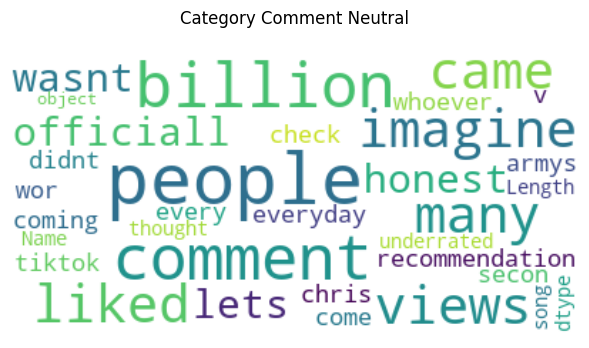

In [41]:
%matplotlib inline
plt.figure(figsize=(25, 15))
neutral_tweets = df_bersih['Comment'][df_bersih["Category Comment"] == 'neutral']
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(neutral_tweets))
plt.subplot(1, 3, 1)
plt.title("Category Comment Neutral\n")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")